# COVID-19 WORLD VACCINATION PROGRESS-EDA


![](https://www.emeraldgrouppublishing.com/sites/default/files/image/covid-cells.jpg)


# Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections

# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import re
import time
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df= pd.read_csv(r"C:\Users\Shilpa\OneDrive\Desktop\Documents\symb\Statistics\country_vaccinations.csv")

# INFORMATION ABOUT DATASET

In [6]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [7]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
std,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [9]:
df.shape

(86512, 15)

In [10]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [11]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [12]:
#converting date column datatype to date
df["date"]= pd.to_datetime(df.date)

In [13]:
df["Total_vaccinations(count)"]= df.groupby("country").total_vaccinations.tail(1)

In [14]:
#Top countries with most vaccinations
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
China             3.263129e+09
India             1.834501e+09
United States     5.601818e+08
Brazil            4.135596e+08
Indonesia         3.771089e+08
Japan             2.543456e+08
Bangladesh        2.436427e+08
Pakistan          2.193686e+08
Vietnam           2.031444e+08
Mexico            1.919079e+08
Germany           1.719400e+08
Russia            1.636012e+08
Philippines       1.487991e+08
Turkey            1.468819e+08
Iran              1.467926e+08
France            1.416662e+08
United Kingdom    1.409683e+08
Italy             1.358709e+08
Thailand          1.288824e+08
South Korea       1.206045e+08
Name: Total_vaccinations(count), dtype: float64

# VISUALIZATION

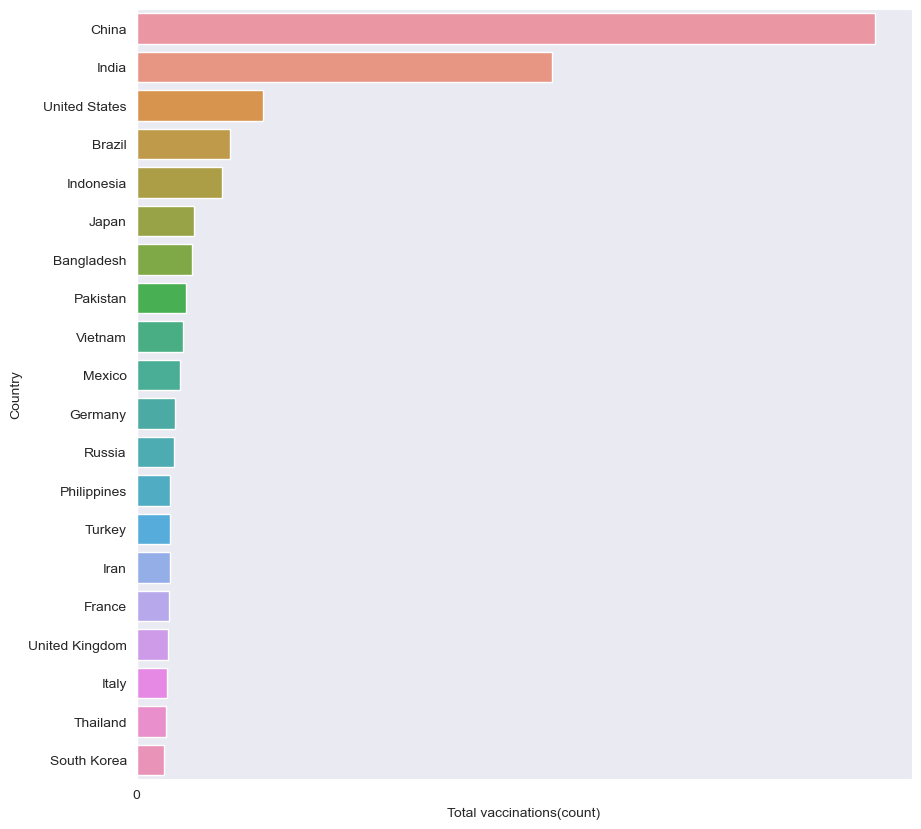

In [22]:
#barplot visualization of top countries with most vaccinations
x= df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("darkgrid")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values)
ax = sns.barplot(x=x.values,y = x.index)

ax.set_xlabel("Total vaccinations(count)")
ax.set_ylabel("Country")
plt.show()

In [23]:
#Top countries with fully  vaccinated peoples
df["Full_vaccinations(count)"]= df.groupby("country").people_fully_vaccinated.tail(1)

df.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
India             828229455.0
United States     217498967.0
Brazil            160272858.0
Indonesia         158830466.0
Bangladesh        107712737.0
Pakistan          101881176.0
Japan             100633737.0
Mexico             79711762.0
Vietnam            77754108.0
Russia             72841232.0
Philippines        65804988.0
Germany            63142649.0
Iran               56810058.0
Turkey             52968985.0
France             52438706.0
Thailand           50159803.0
United Kingdom     49404026.0
Italy              47817555.0
South Korea        44482876.0
England            41501690.0
Name: Full_vaccinations(count), dtype: float64

In [24]:
#barplot visualization of top countries with most full vaccinations

plt.style.use("ggplot")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Fully vaccinated(count)")
ax.set_ylabel("Country")
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x1000 with 0 Axes>

In [25]:
#Vaccine types
x=df.vaccines.unique()
y= list(x)
for i in y: print(i)

Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca
Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V
CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Pfizer/BioNTech
Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik Light, Sputnik V
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Sinopharm/Beijing, Sputnik V
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Johnson&Johnson, Oxford/AstraZene

In [26]:
#most common vaccines
df.vaccines.value_counts()

Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                     7608
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                      6263
Oxford/AstraZeneca                                                                6022
Oxford/AstraZeneca, Pfizer/BioNTech                                               4629
Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech            3564
                                                                                  ... 
Johnson&Johnson, Oxford/AstraZeneca, Sinovac                                       312
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                   311
Johnson&Johnson, Moderna                                                           251
Johnson&Johnson, Pfizer/BioNTech, Sinopharm/Beijing                                228
EpiVacCorona, Oxford/AstraZeneca, QazVac, Sinopharm/Beijing, Sputnik V, ZF2001     190
Name: vaccines, Length: 84, dtype: int64

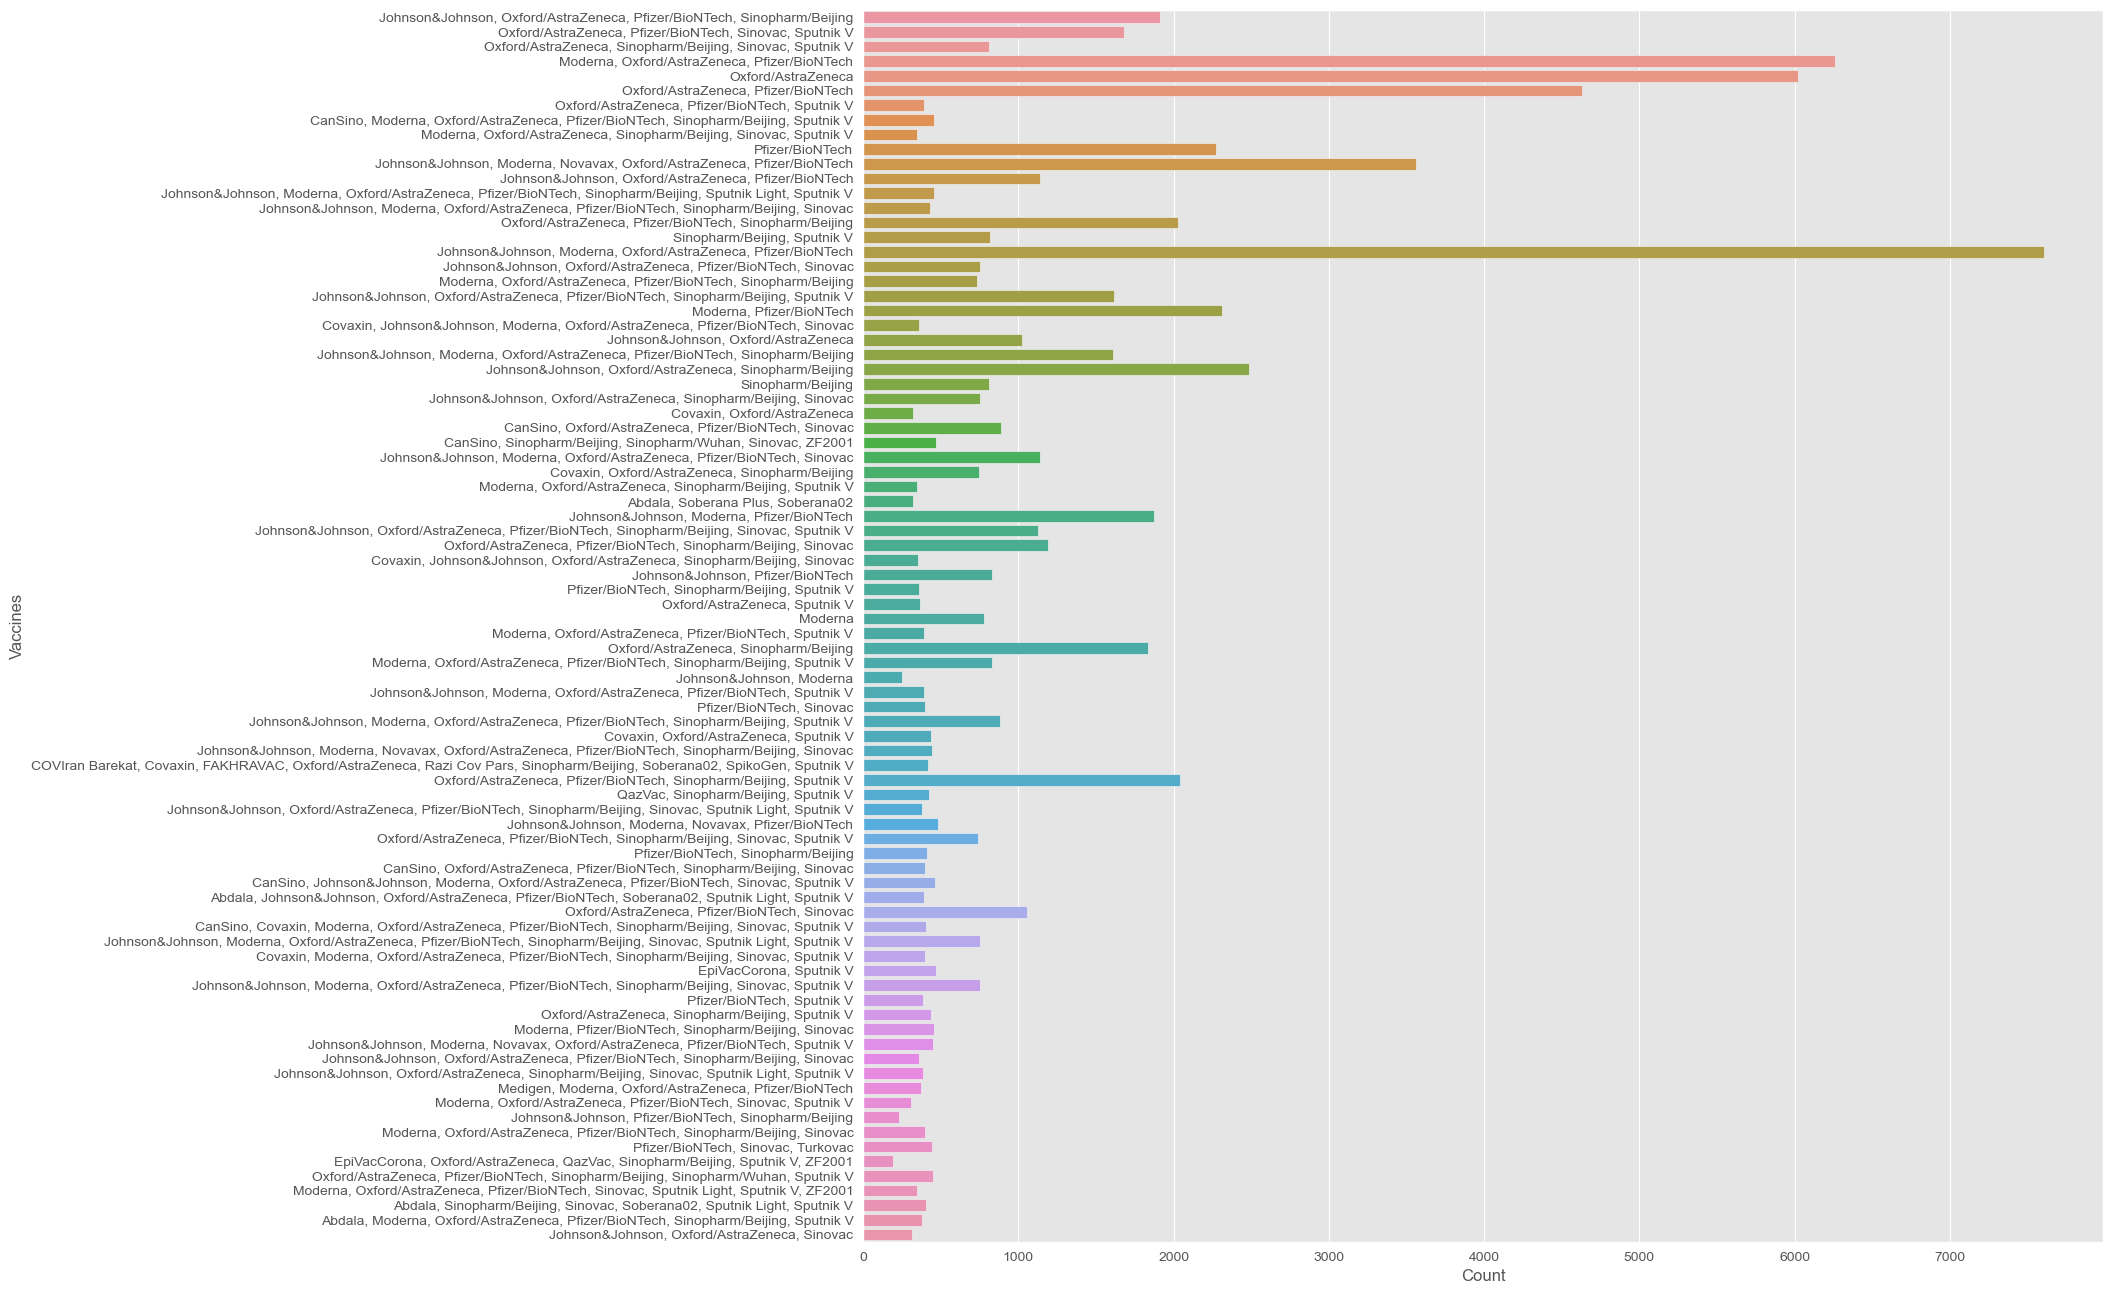

In [27]:
plt.figure(figsize=(16,16))
sns.countplot(y= "vaccines",data= df)
plt.ylabel("Vaccines")
plt.xlabel("Count")
plt.show()

In [28]:
#daily vaccinations
x= df.groupby("date").daily_vaccinations.sum()
plt.style.use("ggplot")
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)
plt.xlabel("Date")
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1500x500 with 0 Axes>

In [ ]:
#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

In [33]:
#Countries with best daily average vaccinations
x= df.groupby("country").daily_vaccinations.mean().sort_values(ascending= False).head(20)
x

country
China             6.930368e+06
India             4.175994e+06
United States     1.191727e+06
Brazil            9.435287e+05
Indonesia         8.462893e+05
Japan             6.215795e+05
Bangladesh        5.453055e+05
Pakistan          5.430051e+05
Vietnam           5.310949e+05
Mexico            4.134253e+05
Germany           3.761575e+05
Philippines       3.665658e+05
Iran              3.535194e+05
Russia            3.480843e+05
Turkey            3.351917e+05
Thailand          3.251471e+05
United Kingdom    3.140841e+05
France            3.104963e+05
South Korea       3.042512e+05
Italy             2.970580e+05
Name: daily_vaccinations, dtype: float64

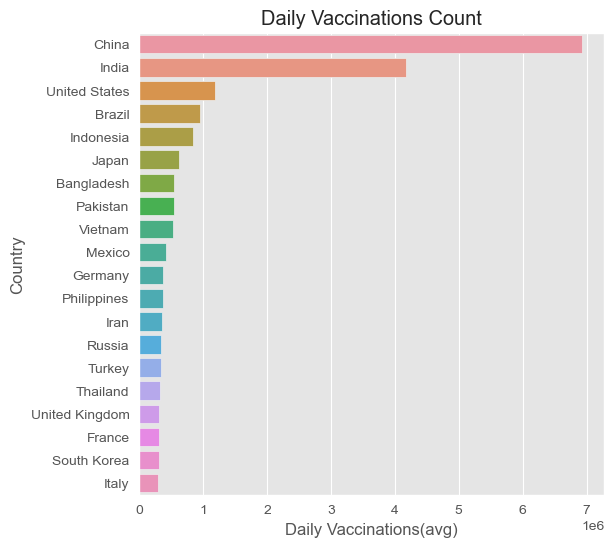

In [35]:
#daily vaccinations barplot
plt.figure(figsize= (6,6))
ax= sns.barplot(x = x.values,y = x.index)
ax.set_title("Daily Vaccinations Count")
ax.set_xlabel("Daily Vaccinations(avg)")
ax.set_ylabel("Country")
plt.show()

In [36]:
#vaccination per hundred top countries
df["Total_vaccinations_per_hundred"]= df.groupby("country").total_vaccinations_per_hundred.tail(1)

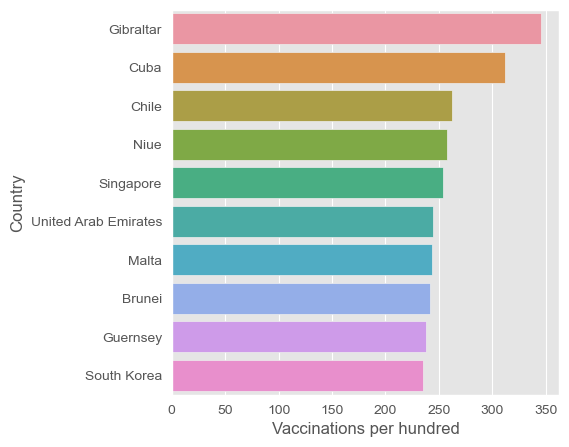

In [40]:
x= df.groupby("country")["Total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,5))
ax= sns.barplot(x = x.values,y = x.index)
ax.set_ylabel("Country")
ax.set_xlabel("Vaccinations per hundred")
plt.show()

In [41]:
#daily vaccinations per million top countries
df.groupby("country")["daily_vaccinations_per_million"].mean().sort_values(ascending= False).head(20)

country
Falkland Islands                   21185.393939
Saint Helena                       13915.164835
Tokelau                            12718.106195
Pitcairn                           10891.797619
Niue                               10109.509434
Cuba                                9955.943333
Gibraltar                           8000.463470
Bonaire Sint Eustatius and Saba     7412.000000
Bhutan                              7241.676880
Brunei                              6906.782857
Turkmenistan                        6618.888889
South Korea                         5930.227273
Uruguay                             5829.491139
Chile                               5764.154525
Singapore                           5585.536424
Malta                               5553.986207
Taiwan                              5545.517426
Guernsey                            5437.624113
Australia                           5422.241895
Vietnam                             5410.000000
Name: daily_vaccinations_per_mil

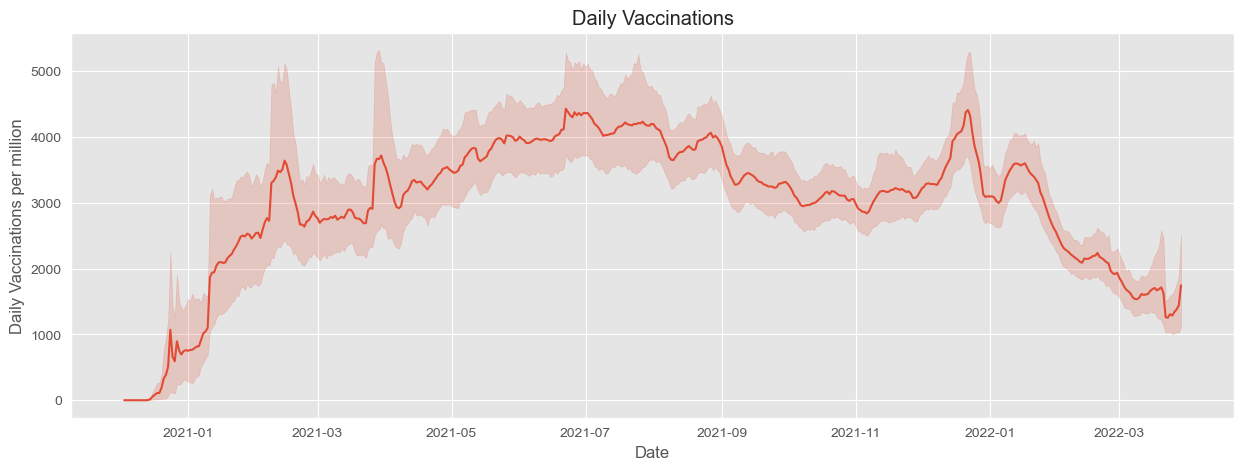

In [42]:
#daily vaccination per million 
plt.figure(figsize= (15,5))
plt.style.use("ggplot")
sns.lineplot(x= "date",y= "daily_vaccinations_per_million",data= df)
plt.title("Daily Vaccinations")
plt.ylabel("Daily Vaccinations per million")
plt.xlabel("Date")
plt.show()

In [ ]:
#people fully vaccinated
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated",data= df)
plt.title("Fully Vaccinated")
plt.xlabel("Date")
plt.ylabel("People Fully Vaccinated")
plt.show()

In [ ]:
#daily vaccinations in India
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.title("Vaccinations in India")
sns.lineplot(x= "date",y= "daily_vaccinations",data= df[df.country== "India"])
plt.show()

In [ ]:
#Total vaccinations in India
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Total vaccinations in India")
sns.lineplot(x= "date",y= "total_vaccinations",data= df[df["country"]=="India"])
plt.show()

In [ ]:
#people_vaccinated per hundred in India
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_vaccinated_per_hundred",data= df[df["country"]=="India"])
plt.show()

In [ ]:
#preferred vaccine in India
x= df[df["country"]=="India"]
z= x.vaccines.value_counts()
c= list(z.index)
c

In [ ]:
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(10)

In [ ]:
#creating dataframe for top 5 vaccinated countries
x= df.loc[(df.country== "United States") | (df.country== "China")| (df.country== "India")| (df.country== "Unted Kingdom")|(df.country== "England")]

In [ ]:
#total vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= x,hue= "country")
plt.xlabel("Date")
plt.title("Total vaccination comparison")
plt.show()

In [ ]:
#daily vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations" ,data= x,hue= "country")
plt.show()

In [ ]:
#full vaccinations comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated" ,data= x,hue= "country")
plt.show()

In [ ]:
#daily vaccination per million comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations_per_million" ,data= x,hue= "country")
plt.show()